In [8]:
from sklearn import datasets
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten ,Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [9]:
data=datasets.load_digits()
x=data.images
y=data.target

In [10]:
x=x.reshape((x.shape[0],8,8,1))
x=x.astype('float32')/255
y=to_categorical(y)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [21]:
earlystop=EarlyStopping(monitor='val_loss',patience=10)
best_weights=ModelCheckpoint('best_weights.h5',save_best_only=True , monitor='val_loss',mode='min')

In [22]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test),
                  callbacks=[earlystop ,best_weights])

Epoch 1/50
45/45 [==============================] - 1s 4ms/step - loss: 2.2896 - accuracy: 0.1747 - val_loss: 2.2681 - val_accuracy: 0.4944
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 2.2164 - accuracy: 0.5164 - val_loss: 2.1500 - val_accuracy: 0.6083
Epoch 3/50
 1/45 [..............................] - ETA: 0s - loss: 2.1255 - accuracy: 0.7500

C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 0s 2ms/step - loss: 2.0175 - accuracy: 0.6695 - val_loss: 1.8698 - val_accuracy: 0.6806
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 1.6441 - accuracy: 0.7676 - val_loss: 1.4283 - val_accuracy: 0.7917
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 1.2176 - accuracy: 0.8427 - val_loss: 1.0500 - val_accuracy: 0.8222
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 0.8846 - accuracy: 0.8615 - val_loss: 0.7856 - val_accuracy: 0.8667
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.8747 - val_loss: 0.6295 - val_accuracy: 0.8833
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.8963 - val_loss: 0.5345 - val_accuracy: 0.8833
Epoch 9/50
45/45 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.9061 - val_loss: 0.4721 - val_accuracy: 0.8889
Epoch 10/50
45/45 [============

# plotting

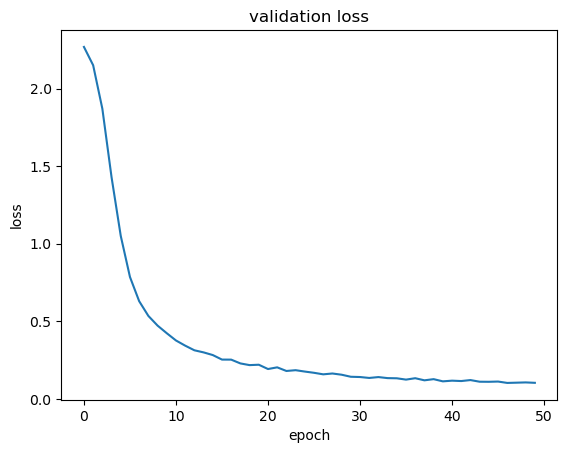

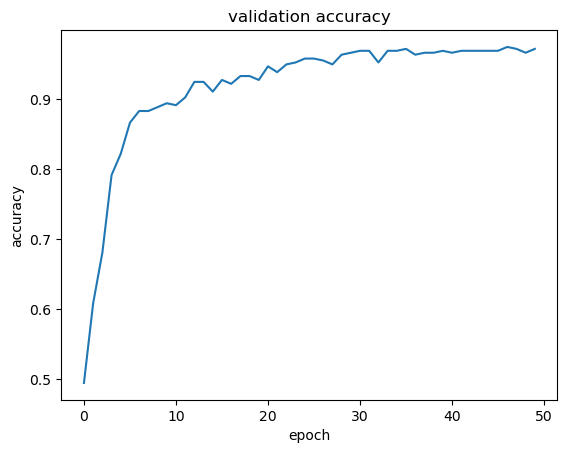

In [24]:
plt.plot(history.history['val_loss'])
plt.title("validation loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.title("validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [25]:
model.load_weights("best_weights.h5")

In [27]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print("test loss:",test_loss)
print("test accuracy:",test_acc)

test loss: 0.10266134142875671
test accuracy: 0.9750000238418579
